In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import copy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/home/hanna/Dokumente/Uni/Semester4/01IntelligenteDatanAnalyse/Projekt/einkommen.train")
# add column names
df.columns = ['Alter', 'Beschaeftigung', 'Gewichtung', 'Bildungsgrad', 'Bildungsdauer', 'Familie','Bereich', 'Partnerschaft', 'Ethnie', 'Geschlecht', 'Gewinn', 'Verlust', 'Zeit', 'Geburtsland', 'Einkommen']
# Klassifizierung des Einkommens
df['Einkommen'].replace({' >50K' : 1, ' <=50K':0}, inplace = True)
# extract train and test data
workdata = df[df.Einkommen != ' ?']
# extract data to apply model
applydata = df[df.Einkommen == ' ?']
# one hot encoding aller daten bis auf Einkommen, deutlich mehr Attribute
wd = pd.get_dummies(workdata.iloc[:,:14])
wd['Einkommen'] = workdata['Einkommen']
X = wd.iloc[:,:105] # alle Daten außer Einkommen
y = wd.iloc[:,105:] #letztendliche Klassifizierung nach Einkommen
print(X.shape)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=5)

# erstellen des Decision Trees mit dem Splitkriterium Entropy, und Best-split, maximale Tiefe ist 20
clf_t = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=20, min_samples_split=5)
clf_tree = clf_t.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

# forest
clf_f=RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth=20, min_samples_split=5)
clf_forest = clf_f.fit(X_train,y_train)
y_pred_forest=clf_forest.predict(X_test)

feature_imp_t = pd.Series(clf_tree.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_f = pd.Series(clf_forest.feature_importances_,index=X.columns).sort_values(ascending=False)

(5000, 105)


No handles with labels found to put in legend.


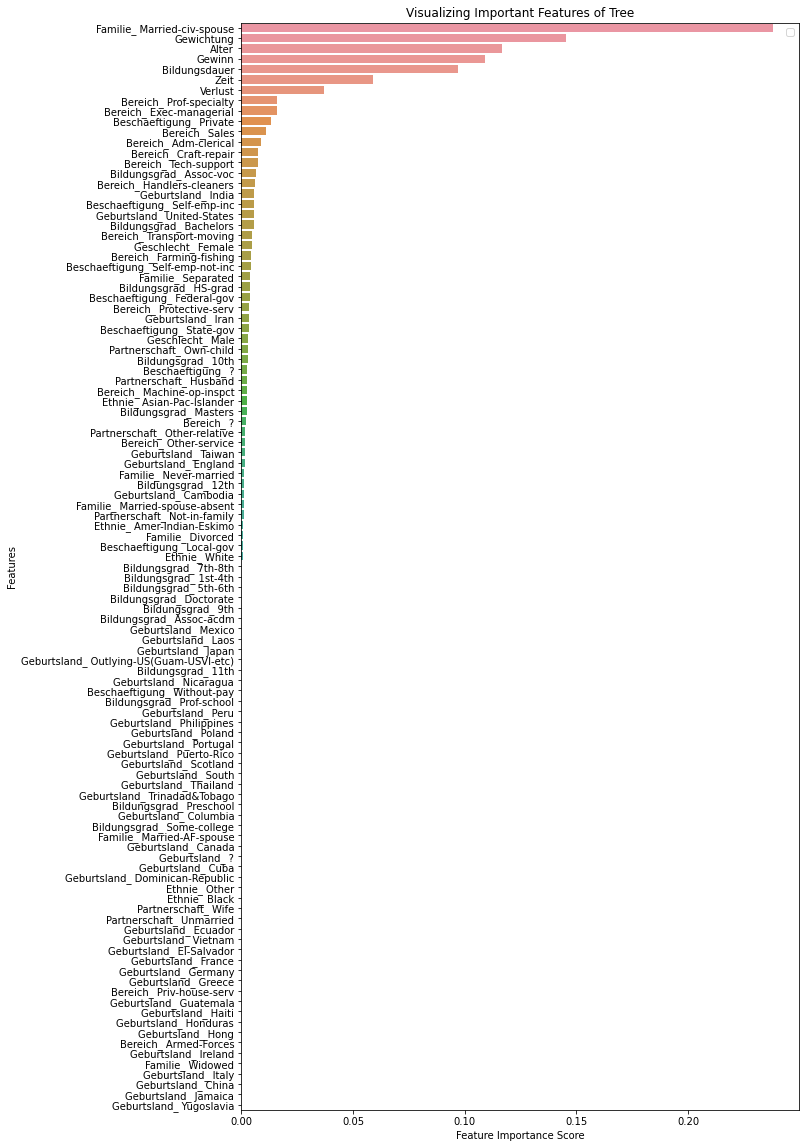

In [9]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot

sns.barplot(x=feature_imp_t, y=feature_imp_t.index)
fig = plt.gcf()
fig.set_size_inches(10, 20)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Tree")
plt.legend()

No handles with labels found to put in legend.


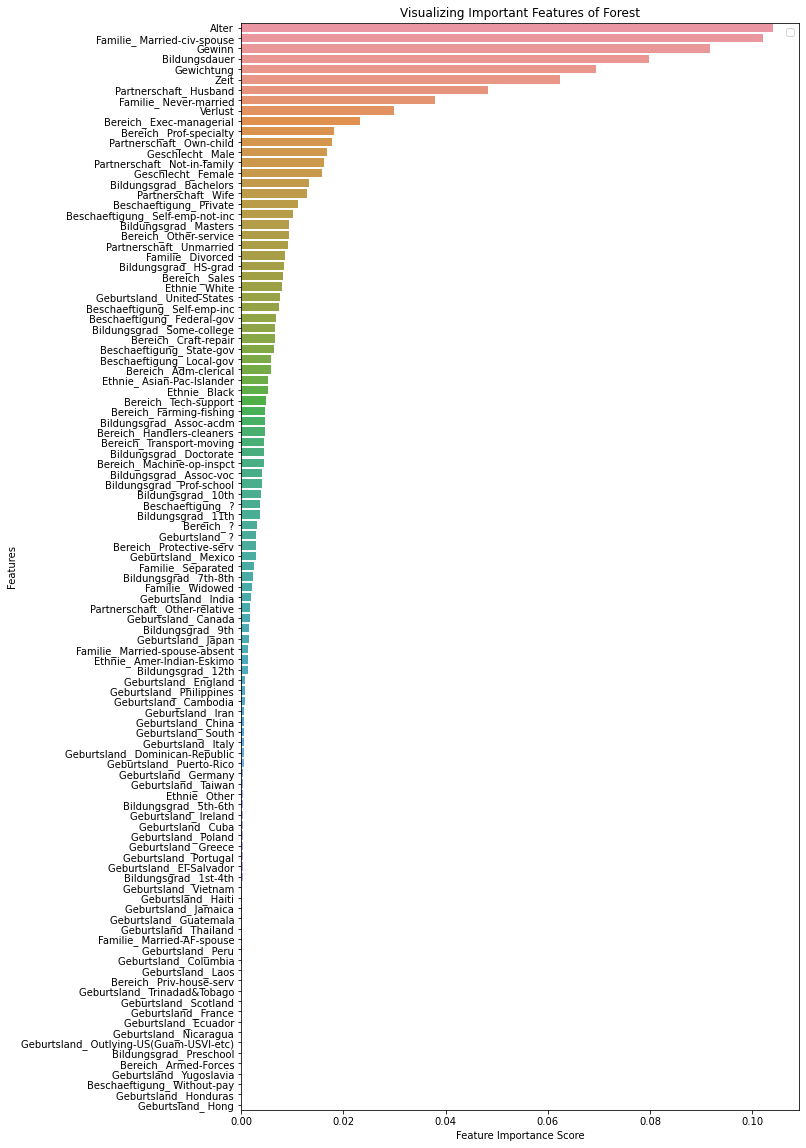

In [10]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot

sns.barplot(x=feature_imp_f, y=feature_imp_f.index)
fig = plt.gcf()
fig.set_size_inches(10, 20)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Forest")
plt.legend()